Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 18, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

Euclidean space may refer to different things, but is often used for the vector space $\mathbb{R}^n$. The Cartesian plane is the 2-dimensional Euclidean space $\mathbb{R}^2$, which is parametrized by coordinates in respect to the two perpendicular axes (usually denoted X and Y).

A point in the Cartesian plane is written as $(x,y)$ where $x,y \in \mathbb{R}$, while a point in Euclidean space is written as an n-dimensonal vector $x = (p_1, p_2, \dots, p_n)$ where $p_i \in \mathbb{R} ~\forall ~1 \leq i \leq n$.

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

A norm of a vector in Euclidean space is a function that assigns a strictly positive value to a vector, representing its length or size. The Euclidean norm is defined by

$$||\vec{x}||_2 := \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$$
 
The addition of two vectors is defined as
 
$$\vec{x} + \vec{y} := (x_1 + y_1, x_2 + y_2, \dots, x_n + y_n)$$
    
and the subtraction is similarly defined as
    
$$\vec{x} - \vec{y} := (x_1 - y_1, x_2 - y_2, \dots, x_n - y_n)$$
    
There is not just one norm but several, like the p-norm.

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

The standard scalar product of two vectors is a function that assigns a scalar value to two vectors, also called the canonical scalar product. It is given by

$$\langle\vec{x}, \vec{y}\rangle := \sum_{i=1}^n x_iy_i$$

The result is 0 when the two vectors are perpendicular to each other. Taking the square root of the standard scalar product of a vector with itself is taking the Euclidean norm of that vector, which calculates its length. The angle between two vectors can also be calculated using the scalar product, because

$$\langle\vec{x}, \vec{y}\rangle \iff ||\vec{x}||~||\vec{y}|| \cos(\theta)$$

where $\theta$ is the angle between x and y.

## Assignment 1: Contrast enhancement [5 Points]

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Contrast is a difference in luminance. Low contrast can be caused by technical limitations or noise. Low contrast can be a problem when it hinders making out details or even just plain differences in an image. Contrast can be improved by contrast enhancement techniques (duh), e.g. streching the used colors to the boundaries, such that more colors are covered/used.

**Ways of measuring contrast:**
- Globally as defined by $c_{global}$
- Locally as defined by $c_{local}$ 

$$\begin{align*}
c_{global} &= \frac{1}{range} | g_{max} - g_{min} |\\
c_{local} &= \frac{1}{MN} \sum_x\sum_y | g(x,y) - \frac{1}{4} \sum_{(v,w)\in N_{x,y}} g(v,w) |
\end{align*}$$

**Contrast enhancement techniques:**
- Histogram Equalization
- Maximizing global contrast $g^{'} = (g-g_{min})(w_{max}-w_{min})/(g_{max}-g_{min}) + w_{min}$
- Improving local contrast $g^{'} = w_{max} (g / w_{max})^\gamma$

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

Histogram equilization uses a CDF (cumulative distribution function) to increase an image's contrast. It can increase an image's entropy, because the number of used color values (usually) increases, meaning there is more uncertainty/impurity.

### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

When considering discrete images, simple mapping may result in a loss of information.

**Table on page 22/23**:

| Gray value    | available color values (3 Bits -> 8 values)   |
| ------------- | --------------------------------------------- |
| Frequency     | # of pixels in the image with that color      |
| $H(g)$        | normalized histogram values (rel. frequency)  |
| Accumulated   | sum of all pixels up to this value (relative) |
| Gray value    | Frequency times Accumulated                   |
| $\lceil~\rceil-1$       | Rounded up gray value - 1                     |
| $H(g^{'}(g))$ | normalized histogram after equalization       |

## Assignment 2: Computing Contrast and Entropy [5 Points]


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

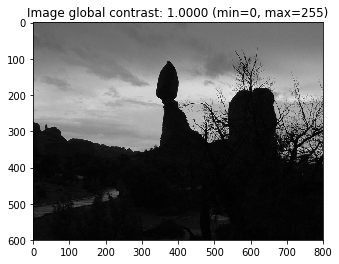

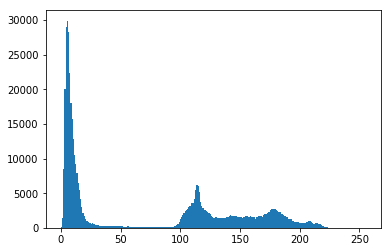

In [2]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        float: The global contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    minimum = np.amin(img)
    maximum = np.amax(img)
        
    contrast = (1 / (value_range[1] - value_range[0])) * (maximum - minimum)

    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

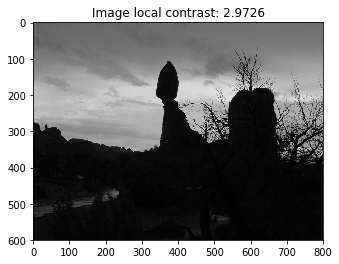

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

def getsumof8neighbors(matrix, i, j):
    region = matrix[max(0, i-1) : i+2,
                    max(0, j-1) : j+2]
    return np.sum(region) - matrix[i, j]

def getsumof4neighbors(matrix, i, j):
    #region = np.array([[i, j-1], [i-1, j], [i+1, j], [i, j+1]])
    #region = np.array([i, j-1]), np.array([i-1, j]), np.array([i+1, j]), np.array([i, j+1])
    
    c_sum = int(0)
    
    c_sum += matrix[i, 0] if (j+1 >= matrix.shape[1]) else matrix[i, j+1];
    c_sum += matrix[0, j] if (i+1 >= matrix.shape[0]) else matrix[i+1, j];
    c_sum += matrix[i, matrix.shape[1]-1] if (j-1 < 0) else matrix[i, j-1];
    c_sum += matrix[matrix.shape[0]-1, j] if (i-1 < 0) else matrix[i-1, j];
        
    return sum

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        float: The local contrast of the image. 
    """

    c_sum = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # could also use np.absolute
            c_sum += abs(img[i, j] - 1/4 * getsumof4neighbors(img, i, j))

    return (1 / (img.shape[0]*img.shape[1])) * c_sum


img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

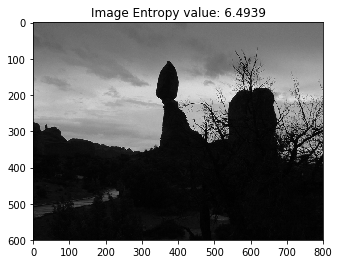

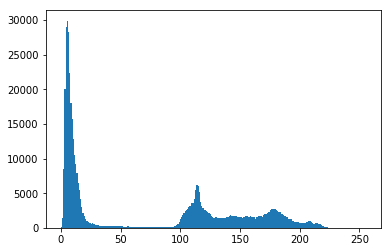

In [6]:
%matplotlib inline
import numpy as np
import math
from imageio import imread

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        float: The entropy of the image. 
    """
    if isinstance(img[0][0], np.float64) :
        img = (img*255).astype(np.uint8) # should this be here?
        
    greyvalues = 256
    bins = np.bincount(img.ravel(), minlength=greyvalues)
    
    #bins = bins/greyvalues
    bins = bins / (img.shape[0] * img.shape[1])

    #bins *= np.where(bins > 0, np.log2(bins), 0)
    
    for i in range(bins.shape[0]):
        if bins[i] > 0:
            bins[i] *= np.log2(bins[i])
        else:
            bins[i] = 0
    
    #print(bins)
    return - np.sum(bins)

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

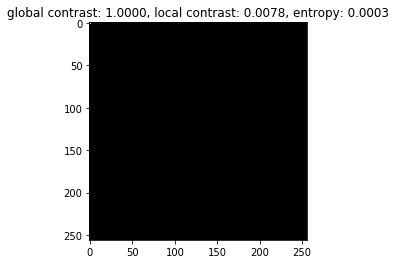

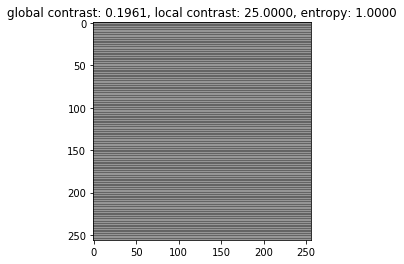

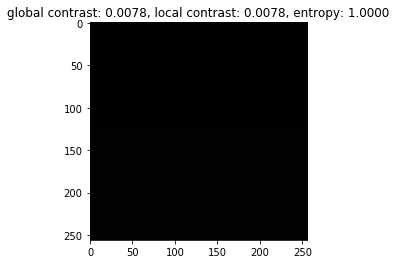

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()

img1 = np.zeros((256, 256),np.uint8)
img1[1,1] = 255
image_info(img1)


img2 = np.zeros((256, 256),np.uint8) + 100
for i in range(int(img2.shape[1]/2)):
    img2[2*i+1] = np.ones(256)*150
image_info(img2)


hb = np.zeros((128, 256),np.uint8) 
hw = np.ones((128, 256),np.uint8) * 2
img3 = np.concatenate((hb, hw))
image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (AHE) [5 Points]

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

Histogram Equalization passt sich nicht an lokale Kontrast-Vorraussetzungen an. Deswegen können kleine Kontrastunterschiede komplett übersehen werden. Außerdem kann es bei HE passieren, dass *Noise* verstärkt wird.

AHE wurde eingefügt um genau diese lokalen Kontraste zu optimieren.

Drawbacks: AHE macht zwar was es soll, aber es fördert auf sehr starke Art und Weise background-Noise. (Noise enhancement)

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

Soll die Noise-Probleme reduzieren, während die computation cost moderat bleiben.
Da es sich jedoch um Kontrastenhancement handelt, gibt es keine 1:1 Beziehung zwischen den Grauwerten.

Die Anzahl der Erlaubten Pixel mit einem gewissen Grauwert (in einem Bin) ist begrenzt. Das sorgt für homogenisiertere Gebiete. Die abgeschnittenen Pixel (clipped) werden gleichmäßig ueber das Histogramm verteilt. Das clip-limit ist die Stellschraube.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

AHE can be implemented efficiently by tiling the image into smaller regions. For each region the histogram, CDF and is computed. The transformation is appropriate only for the cener pixel of a cell, the values of all other pixels are computed using interpolation (with up to four transformation functions).

This scheme improves the runtime because much less transformations need to be calculated, which are more expensive than some additional interpolations.

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

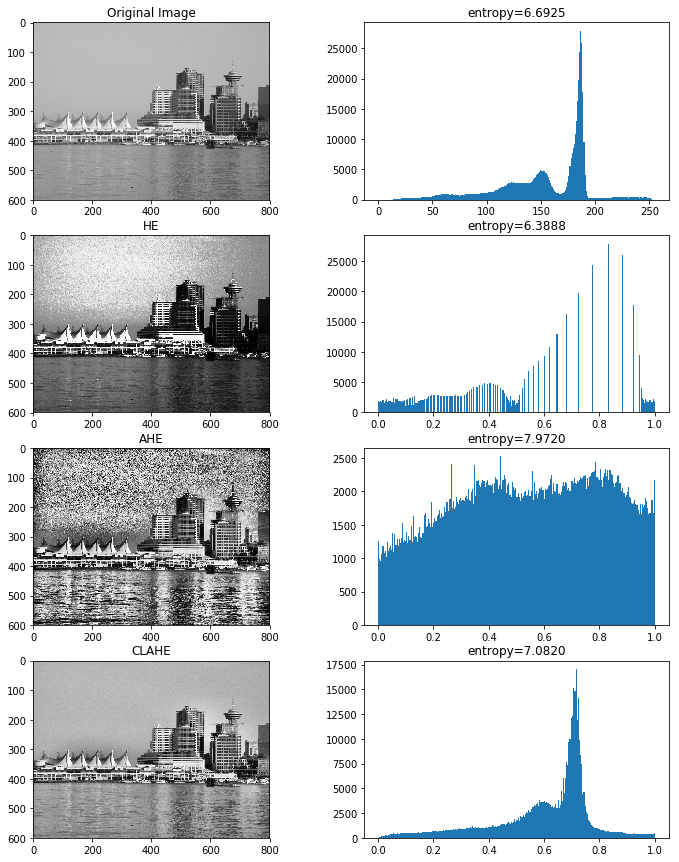

In [17]:
%matplotlib inline
from imageio import imread
from skimage import exposure
import matplotlib.pyplot as plt

img = imread('images/canada.png', pilmode='L')

img_he = exposure.equalize_hist(img)
img_ahe = exposure.equalize_adapthist(img, clip_limit=1.0)
img_clahe = exposure.equalize_adapthist(img)

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps[5 Points]

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

Sequential:

    Solche Colormaps haben einen flüssigen übergang zwischen zwei Farben, 
    der oft durch eine Veränderung der saturation realisiert wird. Sie sind optimal für scientific data.

Diverging:

    In dieser Colormap wird zwischen zwei Farbtönen gewechselt, wobei der median eher Hell ist (weiß). 
    Sie sind besonders für die unterscheidung zwischen positiven und negativen Werten gut geeignet.

Qualitative:

    Diese Art der Colormap wechselt schnell und abrupt die Farbe 
    und sind gut geeignet für Plotlinien auf schwarzem Hintergrund.

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

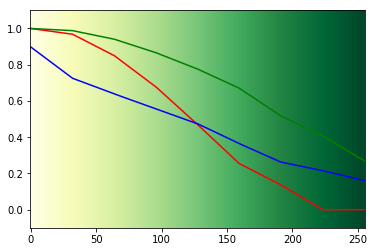

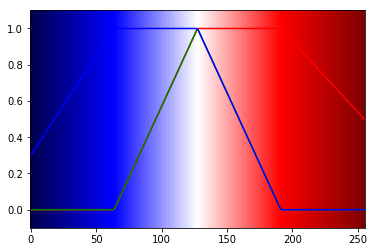

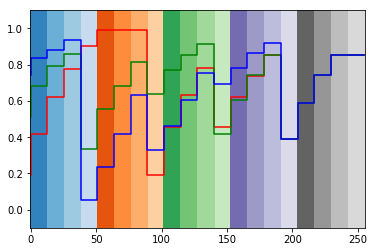

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

#color = []

# The following is just for demonstration: replace and extend by your own examples
#color.append(np.asarray((lambda x: np.sin(x/256*2*np.pi)*128+128, 
#              lambda x: (x//16) * 16,
#              lambda x: (2*x) % 256)))

gray = np.arange(0,256)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

rgb = cm.get_cmap('YlGn')(gray)[:, :3]
plt.plot(gray, rgb[:,0], 'red')
plt.plot(gray, rgb[:,1], 'green')
plt.plot(gray, rgb[:,2], 'blue')
plt.imshow(gradient, aspect='auto', cmap='YlGn', origin='lower')

axes = plt.gca()
axes.set_ylim([-0.1,1.1])
plt.show()

rgb = cm.get_cmap('seismic')(gray)[:, :3]
plt.plot(gray, rgb[:,0], 'red')
plt.plot(gray, rgb[:,1], 'green')
plt.plot(gray, rgb[:,2], 'blue')
plt.imshow(gradient, aspect='auto', cmap='seismic', origin='lower')

axes = plt.gca()
axes.set_ylim([-0.1,1.1])
plt.show()

gray = np.arange(0,21)
rgb = cm.get_cmap('tab20c')(gray)[:, :3]

plt.plot(gray*255/20, rgb[:,0], 'red', drawstyle='steps')
plt.plot(gray*255/20, rgb[:,1], 'green', drawstyle='steps')
plt.plot(gray*255/20, rgb[:,2], 'blue', drawstyle='steps')
plt.imshow(gradient, aspect='auto', cmap='tab20c', origin='lower')

axes = plt.gca()
axes.set_ylim([-0.1,1.1])
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} = \gamma g + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

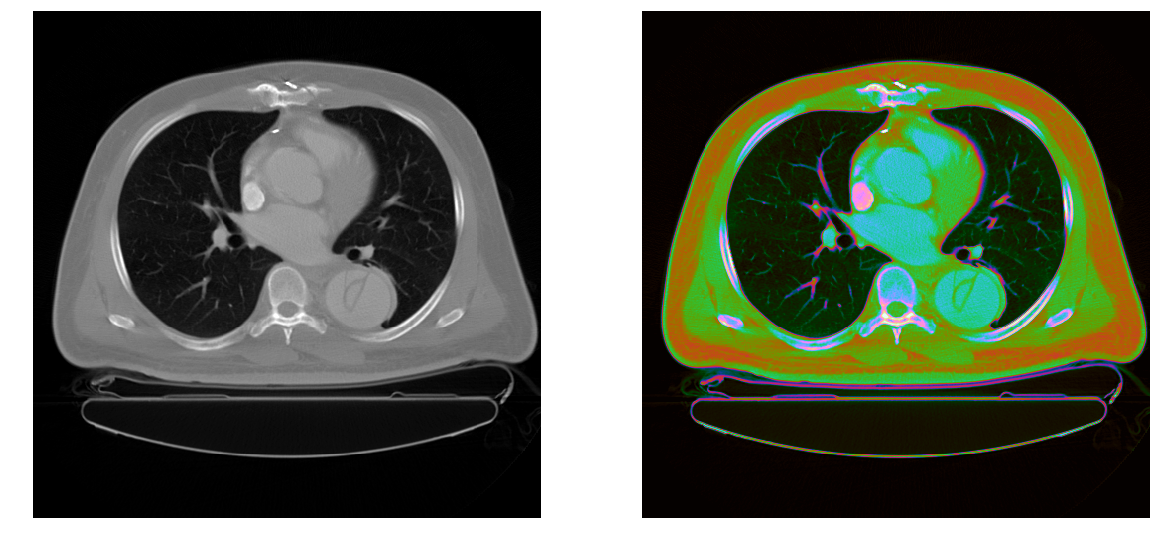

In [375]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

start_color = 1
rotations = 3
hue = 2
gamma = 1.2
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: np.ndarray of shape (256,3)
        The cube helix color map.
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        f = float(i) / 255
        O = 2.0*np.pi*(start_color/3.0 + rotations * f)
        a = (gamma*hue*f*(1-gamma*f))/2.0
        csvector = np.array([np.cos(O), np.sin(O)])
        lookup_table[i] = gamma * f + a * np.matmul(m, csvector)
        
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Parameters:
        img: np.ndarray
            The image (ndim=2)
        lookup_table: np.ndarray
            The lookup table (shape=(256,3))
    Return:
        The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [376]:
# YOUR CODE HERE